In [0]:
import pandas as pd

In [5]:
url = 'https://raw.githubusercontent.com/skandavc18/starsQuasars/master/cat4.csv'
df1 = pd.read_csv(url)

HTTPError: ignored

In [7]:
from google.colab import files
uploaded = files.upload()

Saving cat4.csv to cat4.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['cat4.csv']))


In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
label = ['Stars','Quasars']
no_items = [0,0]

In [11]:
df

,Unnamed: 0,galex_objid,sdss_objid,u,g,r,i,z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,nuv_mag,class,spectrometric_redshift,nuv-u,nuv-g,nuv-r,nuv-i,nuv-z,u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z,pred
0,0,6.374821e+18,1.237667e+18,20.848124,20.591719,20.275167,20.003620,20.300451,0.075471,0.058807,0.040682,0.030231,0.022487,21.195684,1,1.475781,0.347561,0.603966,0.920517,1.192064,0.895233,0.256405,0.572956,0.844503,0.547672,0.316551,0.588099,0.291267,0.271547,-0.025284,-0.296831,1
1,1,6.374821e+18,1.237667e+18,20.177017,20.131323,20.197830,20.047293,19.919939,0.082039,0.063924,0.044223,0.032862,0.024443,21.820044,1,1.982687,1.643026,1.688721,1.622213,1.772751,1.900105,0.045694,-0.020813,0.129725,0.257078,-0.066507,0.084030,0.211384,0.150537,0.277891,0.127354,1
2,2,6.374821e+18,1.237667e+18,21.058020,20.534431,20.291599,20.443823,20.201283,0.081629,0.063604,0.044001,0.032698,0.024321,21.092758,1,0.803131,0.034739,0.558327,0.801159,0.648935,0.891476,0.523588,0.766420,0.614197,0.856737,0.242832,0.090609,0.333149,-0.152224,0.090317,0.242540,1
3,3,6.374821e+18,1.237667e+18,20.866688,20.533670,20.257778,19.890251,19.691072,0.083731,0.065242,0.045134,0.033540,0.024947,22.634310,1,1.847981,1.767622,2.100639,2.376532,2.744059,2.943237,0.333017,0.608910,0.976437,1.175615,0.275892,0.643419,0.842598,0.367527,0.566706,0.199179,1
4,4,6.374821e+18,1.237667e+18,20.024755,20.000088,20.171259,20.368889,20.472017,0.083741,0.065250,0.045140,0.033544,0.024950,20.835552,0,-0.000797,0.810797,0.835464,0.664293,0.466663,0.363535,0.024668,-0.146503,-0.344133,-0.447262,-0.171171,-0.368801,-0.471930,-0.197630,-0.300758,-0.103128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33458,33458,6.374681e+18,1.237662e+18,20.736183,19.931644,19.894526,19.961575,20.011459,0.063730,0.049658,0.034353,0.025528,0.018988,22.391211,0,0.000514,1.655027,2.459566,2.496685,2.429636,2.379751,0.804539,0.841658,0.774609,0.724724,0.037119,-0.029930,-0.079815,-0.067049,-0.116934,-0.049885,1
33459,33459,6.379325e+18,1.237665e+18,19.252342,19.102106,18.632669,18.288738,17.863201,0.050411,0.039280,0.027174,0.020193,0.015020,20.464483,1,0.279257,1.212141,1.362377,1.831814,2.175745,2.601282,0.150236,0.619673,0.963604,1.389141,0.469437,0.813368,1.238905,0.343931,0.769468,0.425537,1
33460,33460,6.374716e+18,1.237662e+18,19.468546,19.163761,18.596302,18.069412,18.147552,0.056412,0.043956,0.030408,0.022597,0.016808,20.149973,1,0.193887,0.681427,0.986212,1.553671,2.080561,2.002420,0.304785,0.872244,1.399134,1.320993,0.567459,1.094349,1.016209,0.526890,0.448750,-0.078140,1
33461,33461,6.374716e+18,1.237662e+18,20.109825,19.667782,18.995096,18.602383,18.376564,0.056854,0.044300,0.030647,0.022774,0.016939,20.448339,1,0.147275,0.338514,0.780558,1.453243,1.845957,2.071775,0.442043,1.114729,1.507442,1.733261,0.672686,1.065399,1.291218,0.392714,0.618532,0.225819,1


In [0]:
for ind in df.index:
  if(df['class'][ind]):
    no_items[1]+=1;
  else:
    no_items[0]+=1;

In [38]:
no_items

[10074, 23389]

In [0]:
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, no_items)
    plt.xlabel('Celestial Objects')
    plt.ylabel('Count of objects')
    plt.xticks(index, label)
    plt.title('Distribution of objects across different classes')
    plt.show()

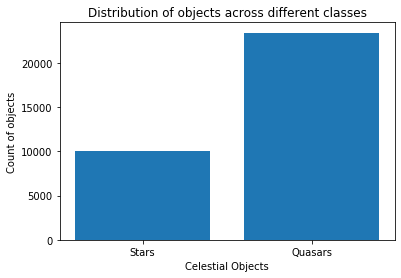

In [40]:
plot_bar_x()

In [56]:
import pandas as pd
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve
from scipy.stats import spearmanr
data = df


data.drop('Unnamed: 0', axis = 1, inplace = True)
red=data['spectrometric_redshift']
data.drop('spectrometric_redshift', axis = 1, inplace = True) #drop redshift else problem is trivial
data.drop('galex_objid',axis = 1, inplace = True)
data.drop('sdss_objid',axis = 1, inplace = True)
data.drop(['pred'], axis=1)
print(data.head())

def red_lab(a):
    a=a.to_numpy()
    b=[]
    for i in a:
        if i<=0.0033:
            b.append(1)
        elif i>=0.004:
            b.append(2)
        else:
            b.append(3)
    return a

X= data.drop(['class'], axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=20)


gbm = lgb.LGBMClassifier(learning_rate = 0.22, metric = 'l1')
gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'])

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

accuracy=accuracy_score(y_pred,y_test)
print("Accuracy :",accuracy)
y_pred=gbm.predict(X, num_iteration=gbm.best_iteration_)
print("validation : ",spearmanr(red,y_pred)[0])

           u          g          r  ...       r-z       i-z  pred
0  20.848124  20.591719  20.275167  ... -0.025284 -0.296831     1
1  20.177017  20.131323  20.197830  ...  0.277891  0.127354     1
2  21.058020  20.534431  20.291599  ...  0.090317  0.242540     1
3  20.866688  20.533670  20.257778  ...  0.566706  0.199179     1
4  20.024755  20.000088  20.171259  ... -0.300758 -0.103128     0

[5 rows x 28 columns]
[1]	valid_0's l1: 0.377813	valid_0's auc: 0.899284	valid_0's binary_logloss: 0.521647
[2]	valid_0's l1: 0.343565	valid_0's auc: 0.912277	valid_0's binary_logloss: 0.464746
[3]	valid_0's l1: 0.316396	valid_0's auc: 0.915765	valid_0's binary_logloss: 0.425677
[4]	valid_0's l1: 0.29453	valid_0's auc: 0.919061	valid_0's binary_logloss: 0.397558
[5]	valid_0's l1: 0.277703	valid_0's auc: 0.921059	valid_0's binary_logloss: 0.377918
[6]	valid_0's l1: 0.262479	valid_0's auc: 0.924518	valid_0's binary_logloss: 0.360157
[7]	valid_0's l1: 0.250249	valid_0's auc: 0.92613	valid_0's binary

In [57]:
data

,u,g,r,i,z,extinction_u,extinction_g,extinction_r,extinction_i,extinction_z,nuv_mag,class,nuv-u,nuv-g,nuv-r,nuv-i,nuv-z,u-g,u-r,u-i,u-z,g-r,g-i,g-z,r-i,r-z,i-z,pred
0,20.848124,20.591719,20.275167,20.003620,20.300451,0.075471,0.058807,0.040682,0.030231,0.022487,21.195684,1,0.347561,0.603966,0.920517,1.192064,0.895233,0.256405,0.572956,0.844503,0.547672,0.316551,0.588099,0.291267,0.271547,-0.025284,-0.296831,1
1,20.177017,20.131323,20.197830,20.047293,19.919939,0.082039,0.063924,0.044223,0.032862,0.024443,21.820044,1,1.643026,1.688721,1.622213,1.772751,1.900105,0.045694,-0.020813,0.129725,0.257078,-0.066507,0.084030,0.211384,0.150537,0.277891,0.127354,1
2,21.058020,20.534431,20.291599,20.443823,20.201283,0.081629,0.063604,0.044001,0.032698,0.024321,21.092758,1,0.034739,0.558327,0.801159,0.648935,0.891476,0.523588,0.766420,0.614197,0.856737,0.242832,0.090609,0.333149,-0.152224,0.090317,0.242540,1
3,20.866688,20.533670,20.257778,19.890251,19.691072,0.083731,0.065242,0.045134,0.033540,0.024947,22.634310,1,1.767622,2.100639,2.376532,2.744059,2.943237,0.333017,0.608910,0.976437,1.175615,0.275892,0.643419,0.842598,0.367527,0.566706,0.199179,1
4,20.024755,20.000088,20.171259,20.368889,20.472017,0.083741,0.065250,0.045140,0.033544,0.024950,20.835552,0,0.810797,0.835464,0.664293,0.466663,0.363535,0.024668,-0.146503,-0.344133,-0.447262,-0.171171,-0.368801,-0.471930,-0.197630,-0.300758,-0.103128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33458,20.736183,19.931644,19.894526,19.961575,20.011459,0.063730,0.049658,0.034353,0.025528,0.018988,22.391211,0,1.655027,2.459566,2.496685,2.429636,2.379751,0.804539,0.841658,0.774609,0.724724,0.037119,-0.029930,-0.079815,-0.067049,-0.116934,-0.049885,1
33459,19.252342,19.102106,18.632669,18.288738,17.863201,0.050411,0.039280,0.027174,0.020193,0.015020,20.464483,1,1.212141,1.362377,1.831814,2.175745,2.601282,0.150236,0.619673,0.963604,1.389141,0.469437,0.813368,1.238905,0.343931,0.769468,0.425537,1
33460,19.468546,19.163761,18.596302,18.069412,18.147552,0.056412,0.043956,0.030408,0.022597,0.016808,20.149973,1,0.681427,0.986212,1.553671,2.080561,2.002420,0.304785,0.872244,1.399134,1.320993,0.567459,1.094349,1.016209,0.526890,0.448750,-0.078140,1
33461,20.109825,19.667782,18.995096,18.602383,18.376564,0.056854,0.044300,0.030647,0.022774,0.016939,20.448339,1,0.338514,0.780558,1.453243,1.845957,2.071775,0.442043,1.114729,1.507442,1.733261,0.672686,1.065399,1.291218,0.392714,0.618532,0.225819,1


In [0]:
arr =data.columns

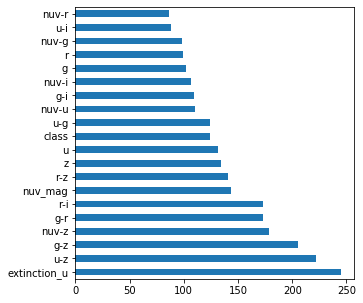

In [64]:
feat_imp = pd.Series(gbm.feature_importances_, index = arr[0:27])
feat_imp.nlargest(20).plot(kind='barh', figsize=(5,5))

In [0]:
s = []
sid = []
q = []
qid = []

In [0]:
for ind in df.index:
  if(df['class'][ind]): #quasar
    q.append(df['spectrometric_redshift'][ind])
    qid.append(ind)
  else: #star
    s.append(df['spectrometric_redshift'][ind])
    sid.append(ind)

In [70]:

len(s)

10074

In [71]:
len(q)

23389

In [75]:
max(df['spectrometric_redshift'])

7.01862668991089

In [76]:
min(df['spectrometric_redshift'])

-0.00654134247452

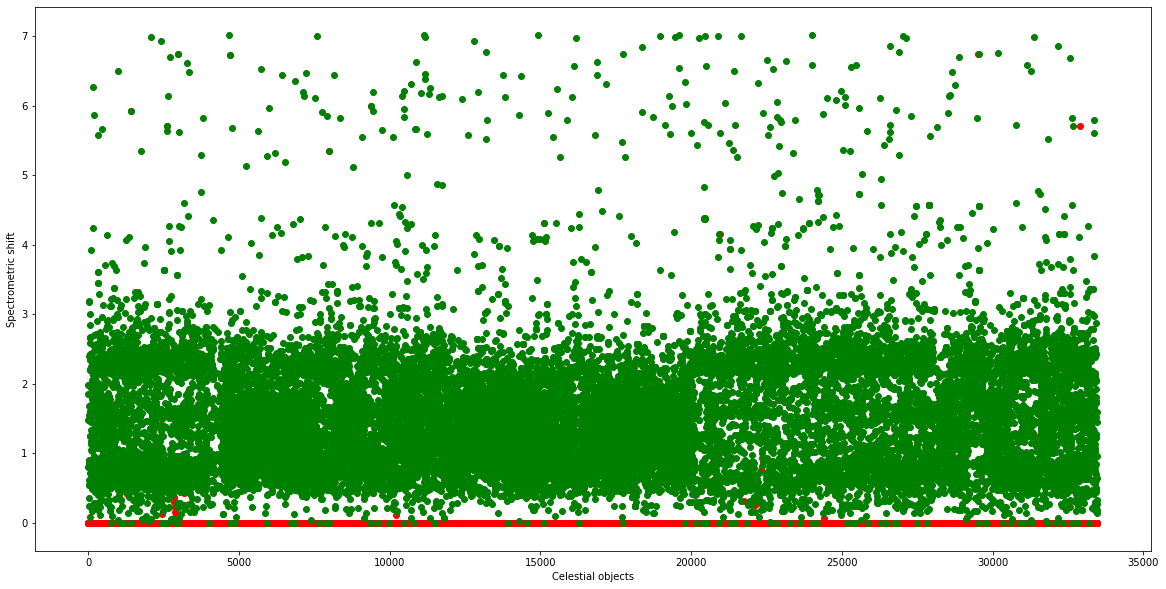

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(20,10))
plt.scatter(sid, s, color='r')
plt.scatter(qid, q, color='g')
plt.xlabel('Celestial objects')
plt.ylabel('Spectrometric shift')
plt.show()